## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 4*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------

Buscar una imagen en grises I, con ruido (el ruido se puede generar de forma sintetica y añadirlo a la imagen). Aplicar una filtrado secuencial, esto es, una secuencia de openings y closings sobre la imagen I (ver seccion 9.6.3), con diferentes elementos estructurantes.

Comparar los resultados obtenidos e indicar cuál es el efecto resultante.

--------

#### *Importar librerías*

Como primer paso, se importan las librerías necesarias para el desarrollo del ejercicio.

In [29]:
import numpy as np
import cv2
from skimage import io, color
import matplotlib.pyplot as plt
from skimage import util, morphology

#### *Cargar imagen original*

Luego, se carga la imagen original en escala de grises.

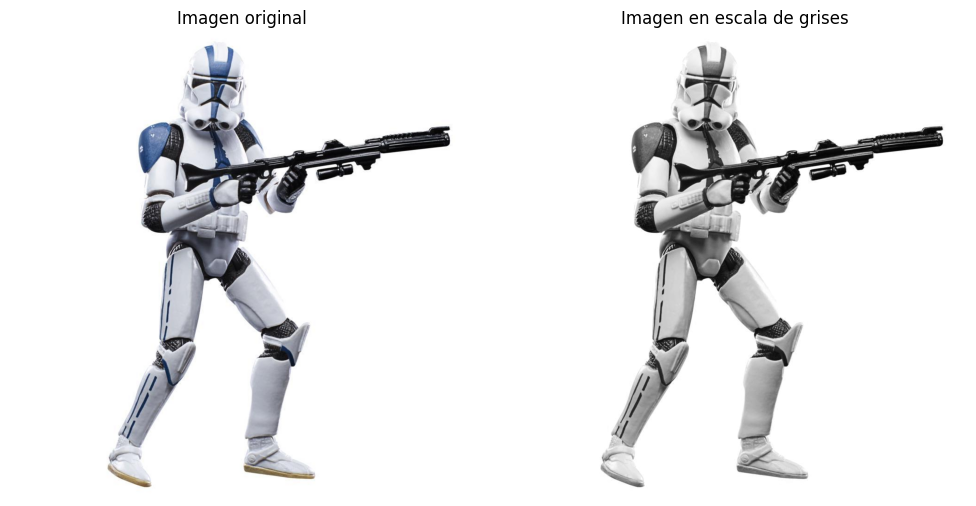

In [30]:
# Cargar la imagen
image_clone_trooper = io.imread('./img/clone-tropper.jpg')

# Convertir la imagen a escala de grises
image_clone_trooper_gray = color.rgb2gray(image_clone_trooper)

# Mostrar la imagen original y la imagen en escala de grises
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_clone_trooper)
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(image_clone_trooper_gray, cmap='gray')
ax[1].set_title('Imagen en escala de grises')
ax[1].axis('off')

plt.tight_layout()
plt.show()


#### *Filtrado secuencial*

En este caso, se agregó un ruido sintético a la imagen original. Luego, se aplicó un filtrado secuencial, es decir, una secuencia de openings y closings sobre la imagen I con diferentes elementos estructurantes.

A continuación, se muestra el código desarrollado para este ejercicio.

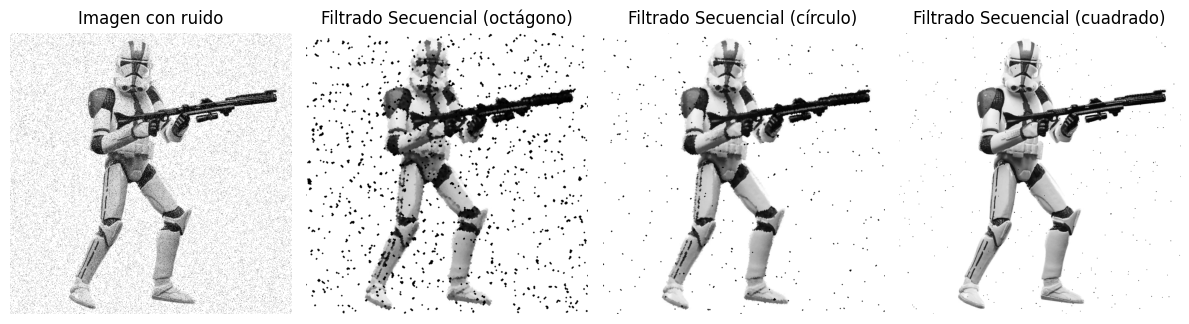

In [41]:
# Agregar ruido sal y pimienta a la imagen en escala de grises
noisy_image = util.random_noise(image_clone_trooper_gray, mode='s&p', amount=0.1)

# Definir elementos estructurantes
selem_square_large = morphology.square(2)
selem_circle_large = morphology.disk(2)
selem_octagon_large = morphology.octagon(2, 2)

# Realizar filtrado secuencial con los elementos estructurantes
filtered_square_large = morphology.closing(morphology.opening(noisy_image, selem_square_large), selem_square_large)
filtered_circle_large = morphology.closing(morphology.opening(noisy_image, selem_circle_large), selem_circle_large)
filtered_octagon_large = morphology.closing(morphology.opening(noisy_image, selem_octagon_large), selem_octagon_large)

# Mostrar las imágenes resultantes
fig, axes = plt.subplots(1, 4, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap='gray')
ax[0].set_title('Imagen con ruido')

ax[2].imshow(filtered_circle_large, cmap='gray')
ax[2].set_title('Filtrado Secuencial (círculo)')

ax[1].imshow(filtered_octagon_large, cmap='gray')
ax[1].set_title('Filtrado Secuencial (octágono)')

ax[3].imshow(filtered_square_large, cmap='gray')
ax[3].set_title('Filtrado Secuencial (cuadrado)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


En este caso, a la imagen original se le agregó ruido sintético. Luego, a través de un filtrado secuencial, se logró reducir el ruido en la imagen. Esto funcionó debido a que el filtrado secuencial es una secuencia de openings y closings.

Más específicamente, el opening es una operación que elimina pequeños detalles de la imagen, mientras que el closing es una operación que elimina pequeños agujeros en la imagen. Por lo tanto, al aplicar una secuencia de openings y closings, se logra reducir el ruido en la imagen.

Cabe destacar que se probó este filtrado secuencial con tres elementos estructurantes diferentes. 

- El octagono logró combatir el ruido en la imágen. Sin embargo, generó varios puntos negros grandes y distinguibles alrededor de la misma. Como resultado, no mejoró significativamente la calidad de la misma. En realidad, opinamos que empeoró. 

- El círculo, por otro lado, logró reducir significativamente el ruido Salt and Pepper. Sin emabrgo, también dejó unos puntos negros. Cabe destacar que estos son menos frecuentes y de menor tamaño, por lo cuál sí existe una mejora. 

- El cuadrado logró reducir el ruido mejor que los otros dos elementos estructurantes. Con este también quedaron unos puntos negros, pero en una mínima cantidad y pequeñitos; casi ya ni siquiera se ven.

En conclusión, esta técnica permite suavizar una imagen y eliminar detalles finos. Asimismo, se logró confirmar que la forma del elemento estructurante afecta qué detalles se preservan.